# Usage: scenario analysis
This is a quick tour of CovsirPhy. Details scenario analysis will be explained.
"Scenario analysis" means that we calculate the number of cases in the future phases with some sets of ODE parameter values. With this analysis, we can estimate the impact of our activities against the outbreak on the number of cases.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-theta-fu1.new.56.420.422.429.449.fix.438.441.450'

## Dataset preparation
Download the datasets to "input" direcotry and load them.  
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)

### Start scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

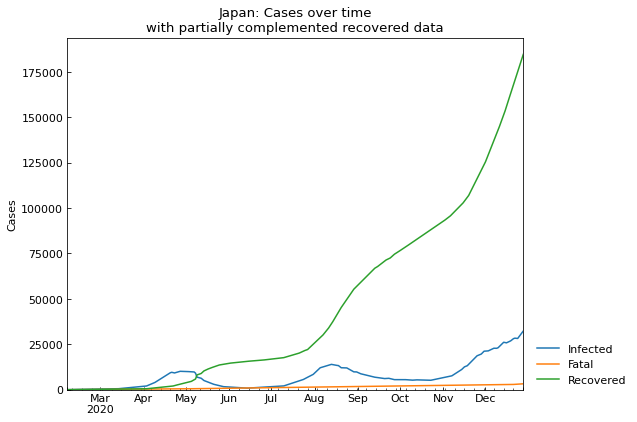

,Date,Infected,Fatal,Recovered
322,2020-12-24,28210,3050,174879
323,2020-12-25,29082,3105,177793
324,2020-12-26,30204,3155,180188
325,2020-12-27,31503,3213,182596
326,2020-12-28,32322,3252,184662


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of daily new cases with `Scenario.record_diff()` method.

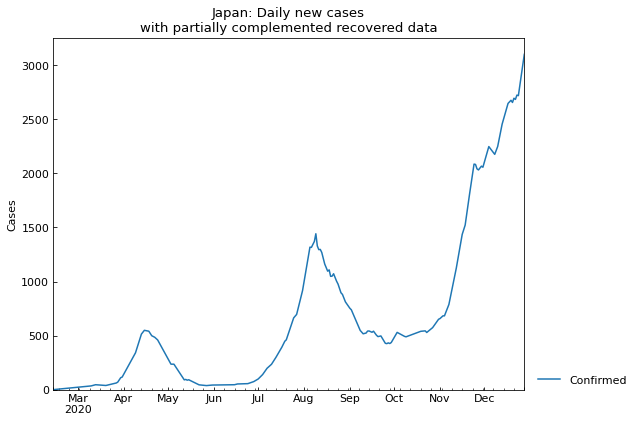

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

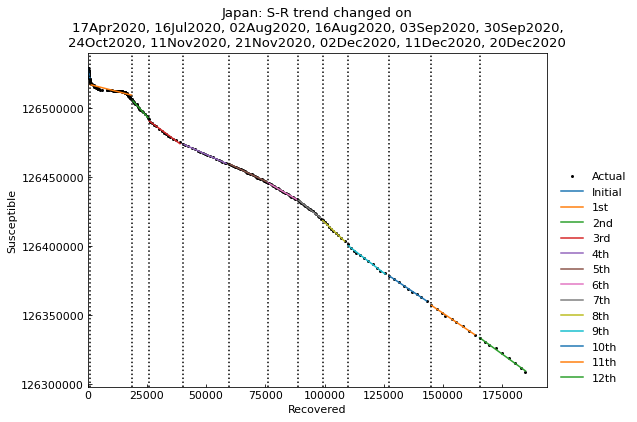

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,15Jul2020,126529100
2nd,Past,16Jul2020,01Aug2020,126529100
3rd,Past,02Aug2020,15Aug2020,126529100
4th,Past,16Aug2020,02Sep2020,126529100
5th,Past,03Sep2020,29Sep2020,126529100
6th,Past,30Sep2020,23Oct2020,126529100
7th,Past,24Oct2020,10Nov2020,126529100
8th,Past,11Nov2020,20Nov2020,126529100
9th,Past,21Nov2020,01Dec2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	12th phase (30Sep2020 - 23Oct2020): finished 2918 trials in 3 min  1 sec


	 7th phase (16Jul2020 - 01Aug2020): finished  952 trials in 0 min 40 sec

	 5th phase (20Dec2020 - 28Dec2020): finished 2984 trials in 3 min  0 sec

	10th phase (21Nov2020 - 01Dec2020): finished 2964 trials in 3 min  0 sec

	 9th phase (06Feb2020 - 16Apr2020): finished 2889 trials in 3 min  0 sec

	11th phase (03Sep2020 - 29Sep2020): finished  321 trials in 0 min 10 sec

	 4th phase (16Aug2020 - 02Sep2020): finished  344 trials in 0 min 10 sec

	 0th phase (17Apr2020 - 15Jul2020): finished 3037 trials in 3 min  0 sec

	 6th phase (11Dec2020 - 19Dec2020): finished  614 trials in 0 min 20 sec

	 2nd phase (11Nov2020 - 20Nov2020): finished 1352 trials in 0 min 50 sec

	 8th phase (02Dec2020 - 10Dec2020): finished  908 trials in 0 min 30 sec

	 3rd phase (24Oct2020 - 10Nov2020): finished 3432 trials in 3 min  0 sec

	 1st phase (02Aug2020 - 15Aug2020): finished 3447 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/gamma [day],1/beta [day],1/alpha2 [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.60,0.018345,0.000166,0.034693,0.007244,480,0.018,46,9,2010,0.258368,2889,3 min 0 sec
1st,Past,17Apr2020,15Jul2020,126529100,SIR-F,0.52,0.091279,0.000141,0.010685,0.018415,480,0.091,18,31,2360,0.354536,3037,3 min 0 sec
2nd,Past,16Jul2020,01Aug2020,126529100,SIR-F,1.94,0.000344,0.000079,0.047556,0.024392,480,0.000,13,7,4209,0.026211,952,0 min 40 sec
3rd,Past,02Aug2020,15Aug2020,126529100,SIR-F,1.50,0.000173,0.000096,0.034042,0.022636,480,0.000,14,9,3484,0.050961,3447,3 min 0 sec
4th,Past,16Aug2020,02Sep2020,126529100,SIR-F,0.76,0.003344,0.000327,0.026373,0.034188,480,0.003,9,12,1020,0.022422,344,0 min 10 sec
5th,Past,03Sep2020,29Sep2020,126529100,SIR-F,0.81,0.000568,0.000426,0.026246,0.032036,480,0.001,10,12,782,0.030561,321,0 min 10 sec
6th,Past,30Sep2020,23Oct2020,126529100,SIR-F,0.99,0.001695,0.000272,0.034247,0.034244,480,0.002,9,9,1225,0.012618,2918,3 min 1 sec
7th,Past,24Oct2020,10Nov2020,126529100,SIR-F,1.29,0.002706,0.000267,0.038483,0.029526,480,0.003,11,8,1249,0.022350,3432,3 min 0 sec
8th,Past,11Nov2020,20Nov2020,126529100,SIR-F,1.64,0.000828,0.000226,0.046814,0.028233,480,0.001,11,7,1476,0.013243,1352,0 min 50 sec
9th,Past,21Nov2020,01Dec2020,126529100,SIR-F,1.41,0.000440,0.000284,0.038581,0.027129,480,0.000,12,8,1172,0.020966,2964,3 min 0 sec


### Accuracy of estimation

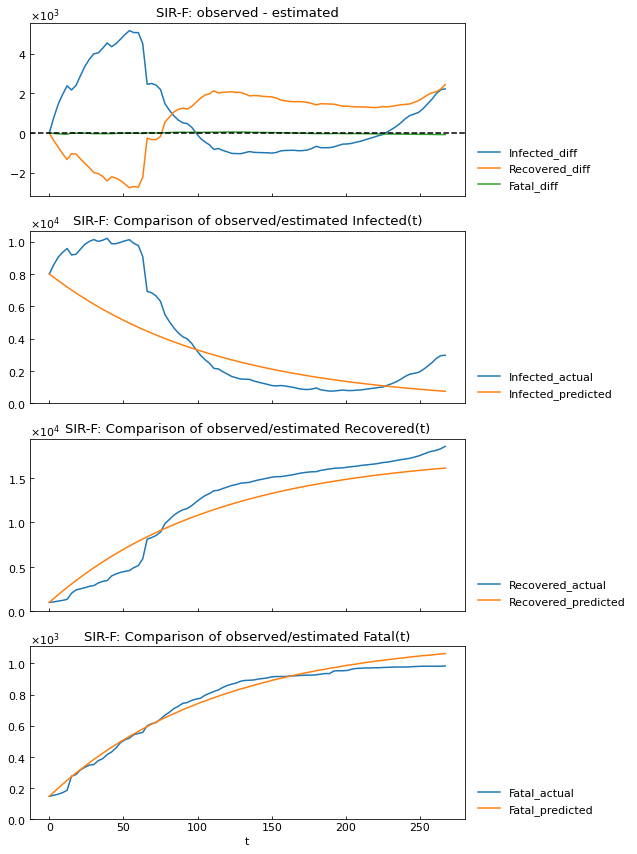

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value
We can get the parameter values of a phase using `Scenario.get()` method.

In [12]:
snl.get("Rt", phase="4th")

0.76

### Show parameter history
`Scenario.history()` method shows the trajectories of parameters (and the number of cases).

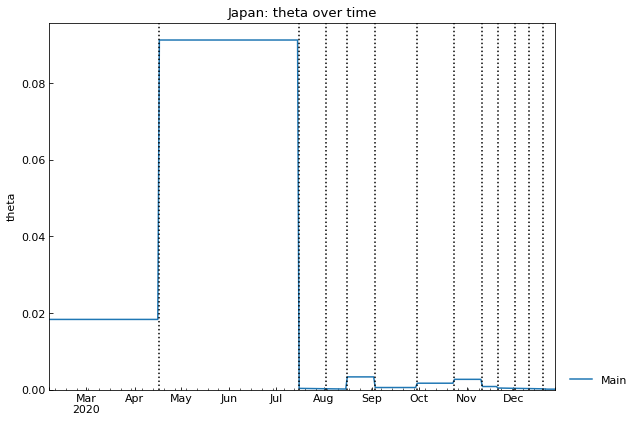

In [13]:
_ = snl.history(target="theta")

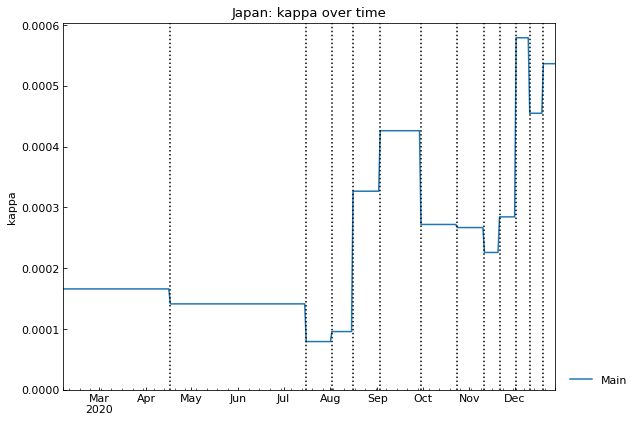

In [14]:
_ = snl.history(target="kappa")

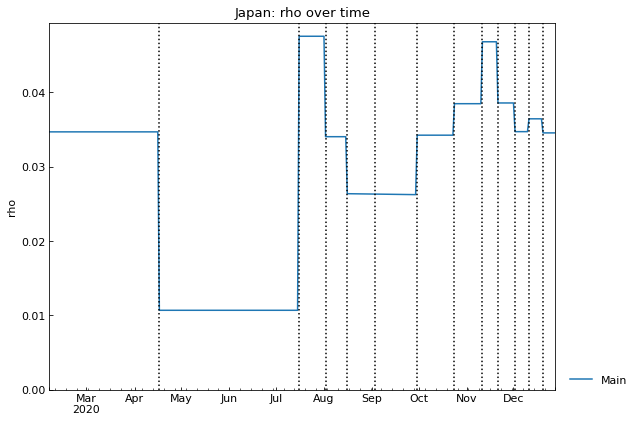

In [15]:
_ = snl.history(target="rho")

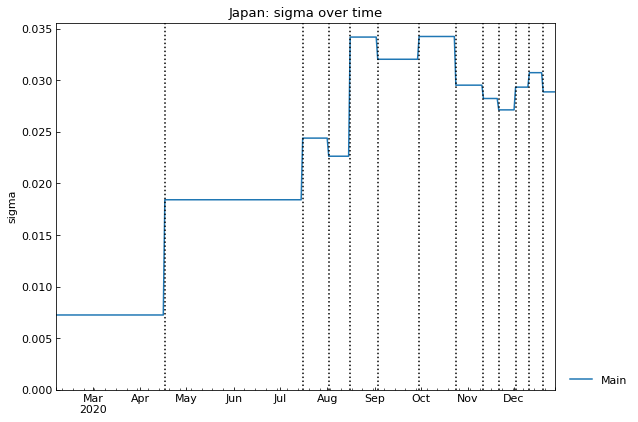

In [16]:
_ = snl.history(target="sigma")

Notes on the history of $\sigma$ value in japan (last updated: 28Dec2020):  
In Japan, we experienced two waves and we are in third wave. In the first wave (Apr - May), recovery period was too long because collapse of the medical care system occurred and no medicines were found.

Sigma values: the first wave < the second wave > the third wave

However, in the second wave (Jul - Oct), recovery period appears short because we have some effective medicines (not approved, in clinical study), yonger people (people un-associated to sever diseases) were infected.

In the third wave (Nov - ), older people tend to be infected and we are facing with medical collapse at this time...

### Show the history of reproduction number
$R_0$ ("R naught") means "the average number of secondary infections caused by an infected host" ([Infection Modeling — Part 1](https://towardsdatascience.com/infection-modeling-part-1-87e74645568a)). When this value is larger than 1, the infection disease is outbreaking.

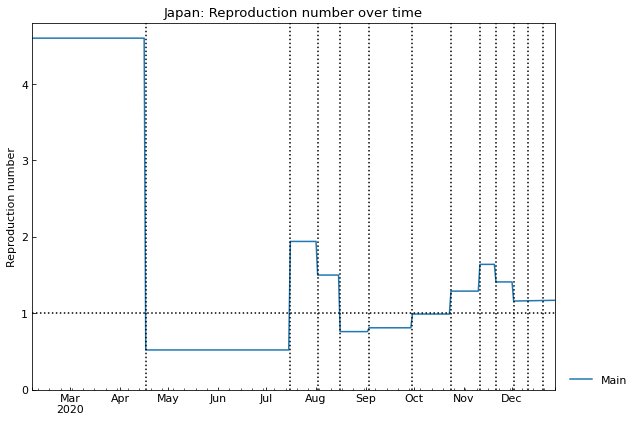

In [17]:
_ = snl.history(target="Rt")

### Simulate the number of cases
We can compare the actual and simulated (with estimated parameter values) number of confirmed/infected/recovered/fatal cases using `Scenario.history()` method.

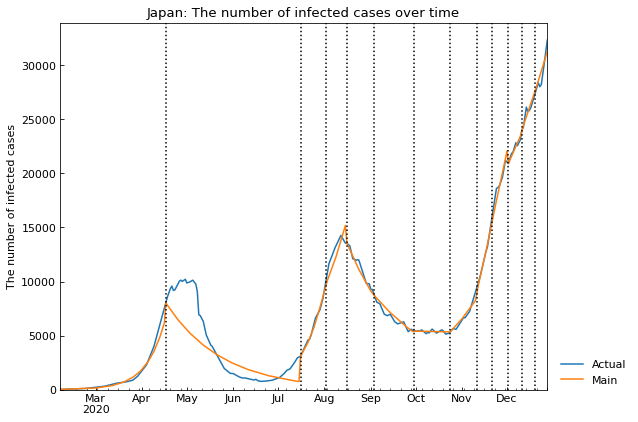

In [18]:
_ = snl.history("Infected")

### Main scenario
If the parameter velues will not be changed until 01Apr2021, how many cases will be? We call this scenario as "Main" scenario.

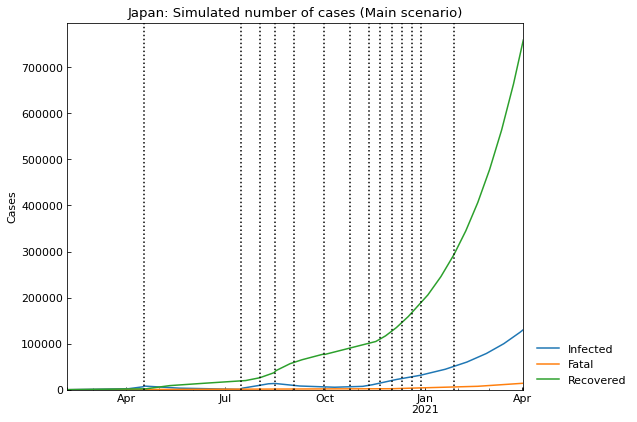

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,851282,13185,122846,715251
418,2021-03-30,864024,13386,124667,725971
419,2021-03-31,876954,13590,126514,736850
420,2021-04-01,890073,13797,128387,747889
421,2021-04-02,903385,14007,130286,759092


In [19]:
# Clear future phases in Main scenario
snl.clear(name="Main")
# Add one future phase 30 days with the parameter set of the last past phase
snl.add(days=30)
# Add one future phase until 01Apr2021 with the same parameter set
snl.add(end_date="01Apr2021", name="Main")
# Simulate the number of cases
snl.simulate(name="Main").tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be? We will call this scenario as "Medicine" scenario.

In [20]:
# Calcuate the current sigma value of the last phase
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.028872781412166884

In [21]:
# Sigma value will be double
sigma_new = sigma_current * 2
sigma_new

0.05774556282433377

In [22]:
# Initialize "Medicine" scenario (with the same past phases as that of Main scenario)
snl.clear(name="Medicine")
# Add 30 days as a new future phases with the same parameter set
snl.add(name="Medicine", days=30, sigma=sigma_current)
# Add a phase until 01Apr2021 with doubled sigma value
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.60   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.52   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.94   
         3rd      Past  02Aug2020  15Aug2020   126529100  SIR-F  1.50   
         4th      Past  16Aug2020  02Sep2020   126529100  SIR-F  0.76   
         5th      Past  03Sep2020  29Sep2020   126529100  SIR-F  0.81   
         6th      Past  30Sep2020  23Oct2020   126529100  SIR-F  0.99   
         7th      Past  24Oct2020  10Nov2020   126529100  SIR-F  1.29   
         8th      Past  11Nov2020  20Nov2020   126529100  SIR-F  1.64   
         9th      Past  21Nov2020  01Dec2020   126529100  SIR-F  1.41   
         10th     Past  02Dec2020  10Dec2020   126529100  SIR-F  1.16   
         11th     Past  11Dec2020  19Dec2020   126529100  SIR-F  1.17   
         12th     Past  20Dec2020  28Dec2020   126529100  SIR-F  1.17   
         13th   Future  29Dec2020  27Jan2021   126529100  SIR-F  1.17   
         14th   Future  28Jan2021  01Apr2021   126529100  SIR-F  1.17   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.60   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.52   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.94   
         3rd      Past  02Aug2020  15Aug2020   126529100  SIR-F  1.50   
         4th      Past  16Aug2020  02Sep2020   126529100  SIR-F  0.76   
         5th      Past  03Sep2020  29Sep2020   126529100  SIR-F  0.81   
         6th      Past  30Sep2020  23Oct2020   126529100  SIR-F  0.99   
         7th      Past  24Oct2020  10Nov2020   126529100  SIR-F  1.29   
         8th      Past  11Nov2020  20Nov2020   126529100  SIR-F  1.64   
         9th      Past  21Nov2020  01Dec2020   126529100  SIR-F  1.41   
         10th     Past  02Dec2020  10Dec2020   126529100  SIR-F  1.16   
         11th     Past  11Dec2020  19Dec2020   126529100  SIR-F  1.17   
         12th     Past  20Dec2020  28Dec2020   126529100  SIR-F  1.17   
         13th   Future  29Dec2020  27Jan2021   126529100  SIR-F  1.17   
         14th   Future  28Jan2021  01Apr2021   126529100  SIR-F  0.59   

                   theta     kappa       rho     sigma  tau  alpha1 [-]  \
Scenario Phase                                                            
Main     0th    0.018345  0.000166  0.034693  0.007244  480       0.018   
         1st    0.091279  0.000141  0.010685  0.018415  480       0.091   
         2nd    0.000344  0.000079  0.047556  0.024392  480       0.000   
         3rd    0.000173  0.000096  0.034042  0.022636  480       0.000   
         4th    0.003344  0.000327  0.026373  0.034188  480       0.003   
         5th    0.000568  0.000426  0.026246  0.032036  480       0.001   
         6th    0.001695  0.000272  0.034247  0.034244  480       0.002   
         7th    0.002706  0.000267  0.038483  0.029526  480       0.003   
         8th    0.000828  0.000226  0.046814  0.028233  480       0.001   
         9th    0.000440  0.000284  0.038581  0.027129  480       0.000   
         10th   0.000324  0.000579  0.034721  0.029334  480       0.000   
         11th   0.000232  0.000455  0.036449  0.030736  480       0.000   
         12th   0.000144  0.000536  0.034554  0.028873  480       0.000   
         13th   0.000144  0.000536  0.034554  0.028873  480       0.000   
         14th   0.000144  0.000536  0.034554  0.028873  480       0.000   
Medicine 0th    0.018345  0.000166  0.034693  0.007244  480       0.018   
         1st    0.091279  0.000141  0.010685  0.018415  480       0.091   
         2nd    0.000344  0.000079  0.047556  0.024392  480       0.000   
         3rd    0.000173  0.000096  0.034042  0.022636  480       0.000   
         4th    0.003344  0.000327  0.026373  0.034188  480       0.003   
         5th    0.000568  0.000

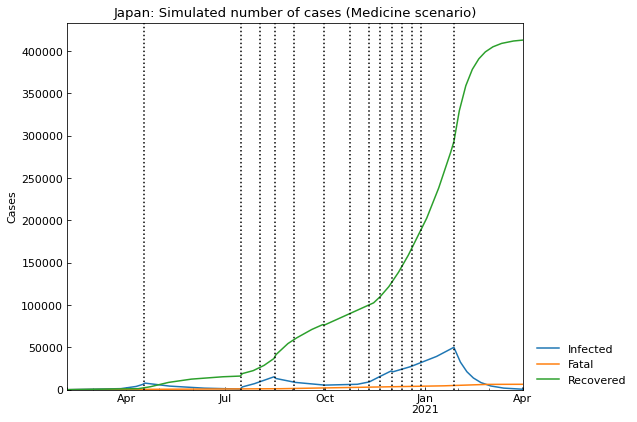

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,419680,6389,687,412604
418,2021-03-30,419749,6390,640,412719
419,2021-03-31,419812,6391,596,412825
420,2021-04-01,419872,6392,555,412925
421,2021-04-02,419926,6392,517,413017


In [23]:
# Simulate the number of cases
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [24]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,14th_Rt
Main,130286,02Apr2021,903385,130286,14007,1.17
Medicine,50069,28Jan2021,419926,517,6392,0.59


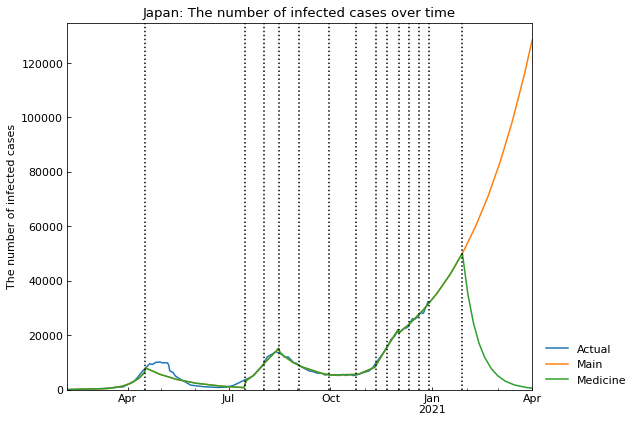

In [25]:
_ = snl.history(target="Infected")

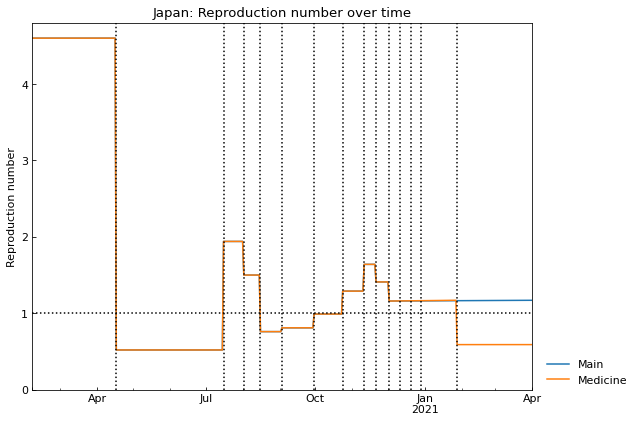

In [26]:
_ = snl.history(target="Rt")

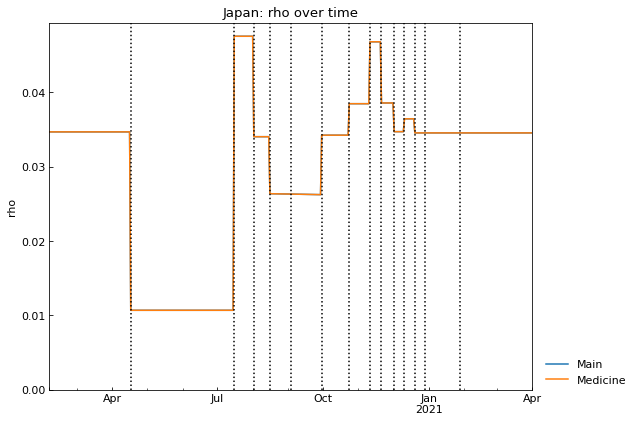

In [27]:
_ = snl.history(target="rho")

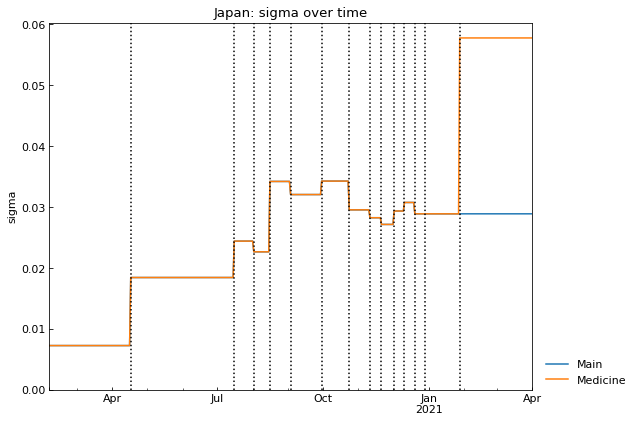

In [28]:
_ = snl.history(target="sigma")

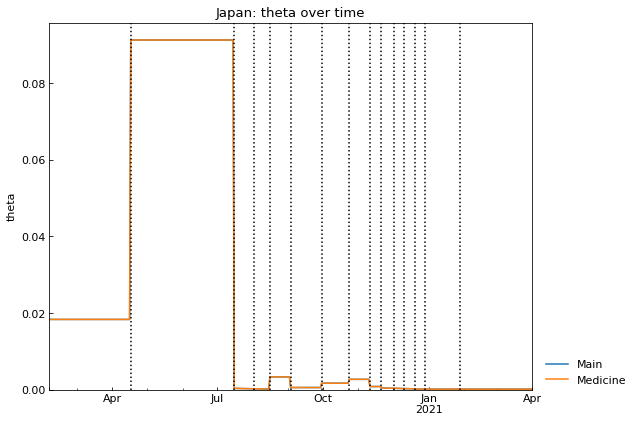

In [29]:
_ = snl.history(target="theta")

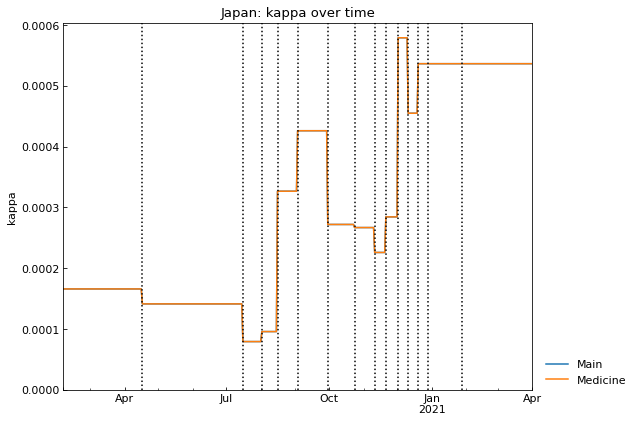

In [30]:
_ = snl.history(target="kappa")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

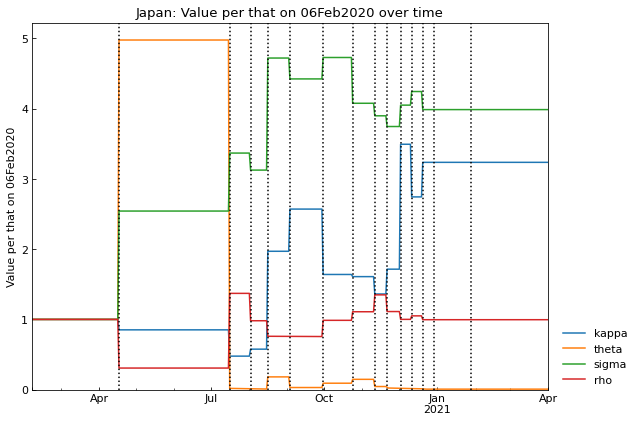

In [31]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [32]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	12th phase (30Sep2020 - 23Oct2020): finished 3085 trials in 3 min  0 sec


	 7th phase (16Jul2020 - 01Aug2020): finished  957 trials in 0 min 40 sec

	10th phase (21Nov2020 - 01Dec2020): finished 2771 trials in 3 min  0 sec

	 9th phase (06Feb2020 - 16Apr2020): finished 2739 trials in 3 min  1 sec

	 5th phase (20Dec2020 - 28Dec2020): finished 2768 trials in 3 min  1 sec

	11th phase (03Sep2020 - 29Sep2020): finished  565 trials in 0 min 20 sec

	 4th phase (16Aug2020 - 02Sep2020): finished  335 trials in 0 min 10 sec

	 0th phase (17Apr2020 - 15Jul2020): finished 2756 trials in 3 min  1 sec

	 6th phase (11Dec2020 - 19Dec2020): finished  624 trials in 0 min 20 sec

	 2nd phase (11Nov2020 - 20Nov2020): finished 1311 trials in 0 min 50 sec

	 8th phase (02Dec2020 - 10Dec2020): finished  859 trials in 0 min 30 sec

	 3rd phase (24Oct2020 - 10Nov2020): finished 3361 trials in 3 min  0 sec

	 1st phase (02Aug2020 - 15Aug2020): finished 3358 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 2nd phase (16Aug2020 - 28Dec2020): finished 10631 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [33]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.60  0.018345  0.000166   
              1st    17Apr2020  15Jul2020  SIR-F  0.54  0.083129  0.000159   
              2nd    16Jul2020  01Aug2020  SIR-F  1.94  0.000344  0.000079   
              3rd    02Aug2020  15Aug2020  SIR-F  1.50  0.000173  0.000096   
              4th    16Aug2020  02Sep2020  SIR-F  0.76  0.003344  0.000327   
              5th    03Sep2020  29Sep2020  SIR-F  0.80  0.000234  0.000453   
              6th    30Sep2020  23Oct2020  SIR-F  0.99  0.001695  0.000272   
              7th    24Oct2020  10Nov2020  SIR-F  1.29  0.002706  0.000267   
              8th    11Nov2020  20Nov2020  SIR-F  1.64  0.000828  0.000226   
              9th    21Nov2020  01Dec2020  SIR-F  1.41  0.000440  0.000284   
              10th   02Dec2020  10Dec2020  SIR-F  1.16  0.000324  0.000579   
              11th   11Dec2020  19Dec2020  SIR-F  1.17  0.000232  0.000455   
              12th   20Dec2020  28Dec2020  SIR-F  1.17  0.000144  0.000536   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.60  0.018345  0.000166   
              1st    17Apr2020  15Jul2020  SIR-F  0.54  0.083129  0.000159   
              2nd    16Jul2020  01Aug2020  SIR-F  1.94  0.000344  0.000079   
              3rd    02Aug2020  15Aug2020  SIR-F  1.50  0.000173  0.000096   
              4th    16Aug2020  28Dec2020  SIR-F  1.50  0.000173  0.000096   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.034693  0.007244  0.258368    2739  3 min  1 sec  
              1st    0.010897  0.018396  0.354543    2756  3 min  1 sec  
              2nd    0.047556  0.024392  0.026211     957  0 min 40 sec  
              3rd    0.034042  0.022636  0.050961    3358  3 min  0 sec  
              4th    0.026373  0.034188  0.022422     335  0 min 10 sec  
              5th    0.025834  0.031888  0.027875     565  0 min 20 sec  
              6th    0.034247  0.034244  0.012618    3085  3 min  0 sec  
              7th    0.038483  0.029526  0.022350    3361  3 min  0 sec  
              8th    0.046814  0.028233  0.013243    1311  0 min 50 sec  
              9th    0.038581  0.027129  0.020966    2771  3 min  0 sec  
              10th   0.034721  0.029334  0.008130     859  0 min 30 sec  
              11th   0.036449  0.030736  0.010867     624  0 min 20 sec  
              12th   0.034554  0.028873  0.014268    2768  3 min  1 sec  
Retrospective 0th    0.034693  0.007244  0.258368    2739  3 min  1 sec  
              1st    0.010897  0.018396  0.354543    2756  3 min  1 sec  
              2nd    0.047556  0.024392  0.026211     957  0 min 40 sec  
              3rd    0.034042  0.022636  0.050961    3358  3 min  0 sec  
              4th    0.034042  0.022636  1.823135   10631  3 min  0 sec

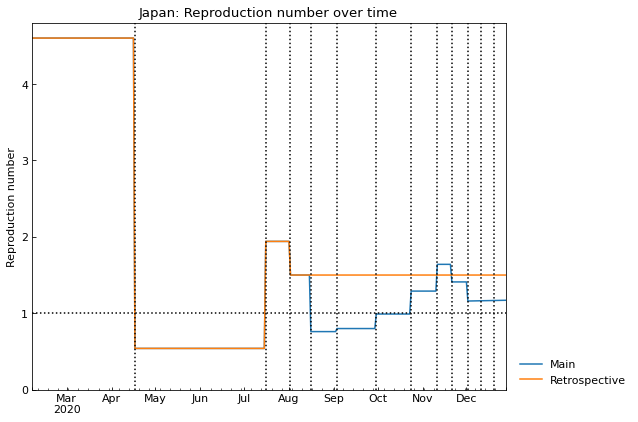

In [34]:
# History of reproduction number
_ = snl_retro.history("Rt")

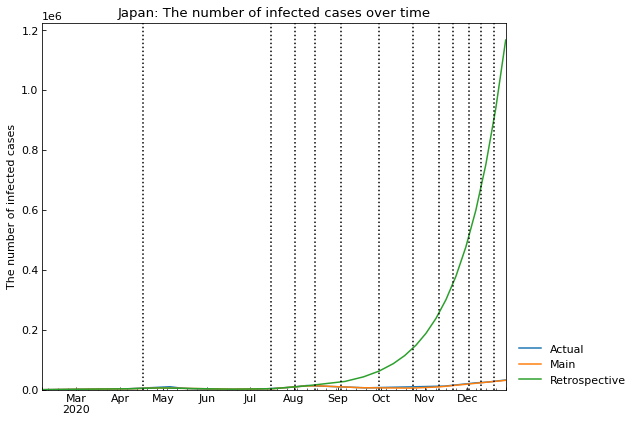

In [35]:
# History of Infected
_ = snl_retro.history("Infected")

In [36]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 29Dec2020,Infected on 29Dec2020,Fatal on 29Dec2020,4th_Rt,5th_Rt,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,31745,29Dec2020,223509,31745,3307,0.76,0.8,0.99,1.29,1.64,1.41,1.16,1.17,1.17
Retrospective,1202720,29Dec2020,3749247,1202720,12267,1.50,-,-,-,-,-,-,-,-
